In [ ]:
# Start writing code here...

import numpy as np
import pandas as pd
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import sklearn  as skl

from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings


from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from catboost              import CatBoostClassifier

set_config(display='diagram') 

In [ ]:
df = pd.read_csv('heart.csv')
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Correlation Map**

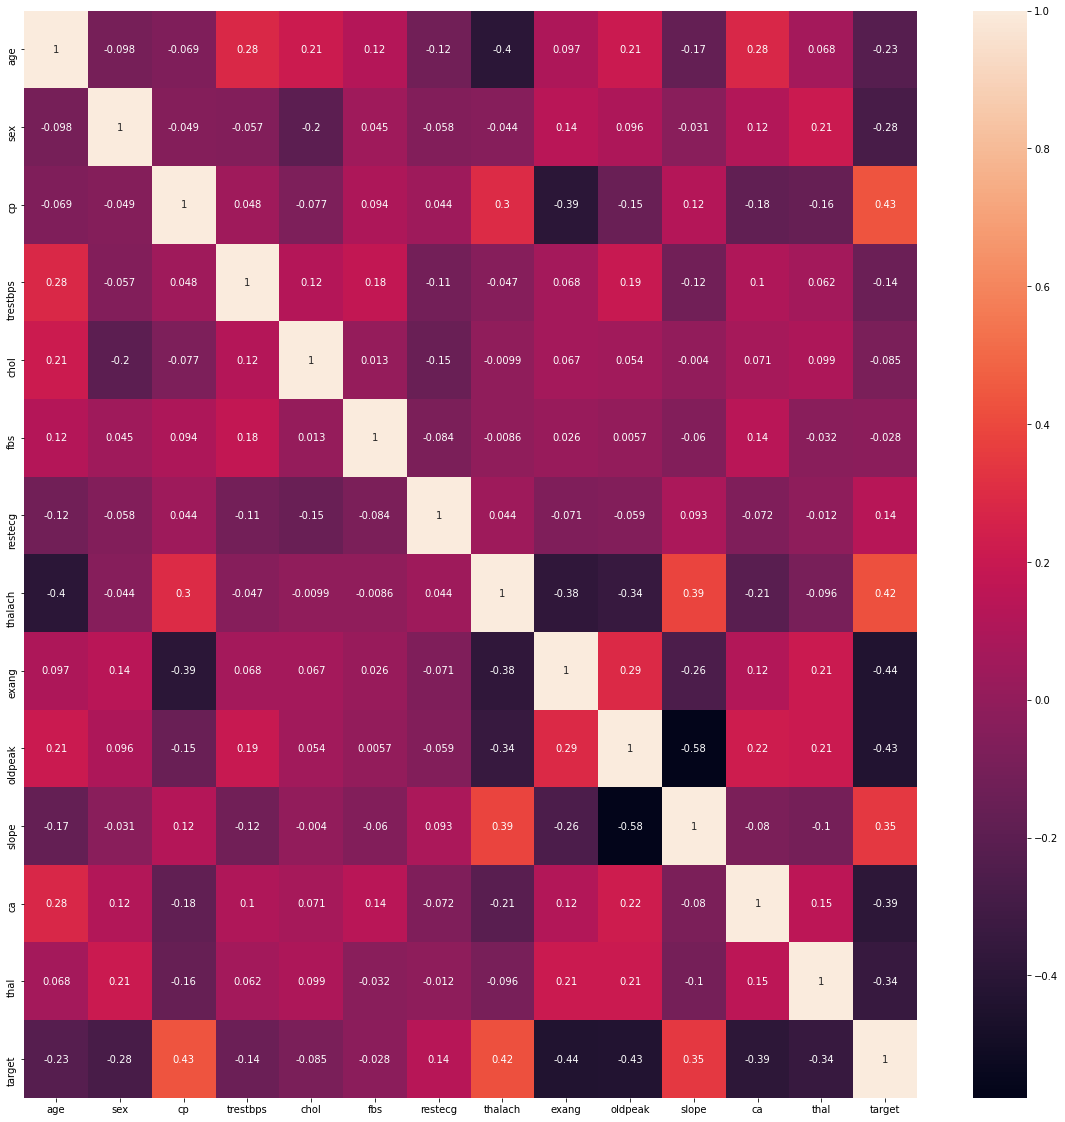

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="rocket")

<AxesSubplot:xlabel='target', ylabel='count'>

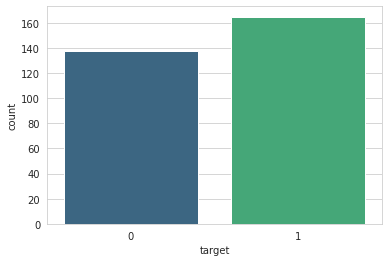

In [ ]:
#Targets destribution

sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='viridis')

In [ ]:
#One hot encoder
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
# Normalization of the dataset

standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
# Our Scaled and Normalized dataset

dataset.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
# X and Y of our model

y = dataset['target']
X = dataset.drop(['target'], axis = 1)

**KNN MODEL**

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

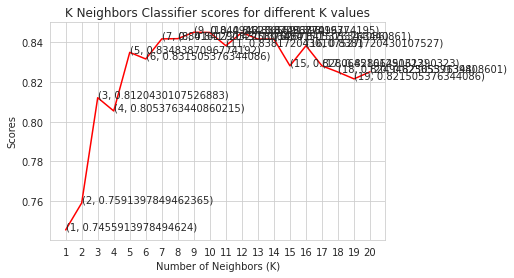

<Figure size 1600x4000 with 0 Axes>

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')




from matplotlib.pyplot import figure


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

score.mean()

0.8448387096774195

In [ ]:

randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

score.mean()

0.8049462365591398

In [ ]:
knn_scores 

[0.7455913978494624,
 0.7591397849462365,
 0.8120430107526883,
 0.8053763440860215,
 0.8348387096774192,
 0.831505376344086,
 0.8416129032258064,
 0.8417204301075267,
 0.8449462365591398,
 0.8448387096774193,
 0.8381720430107527,
 0.8448387096774195,
 0.841505376344086,
 0.8415053763440861,
 0.8280645161290323,
 0.8381720430107527,
 0.8280645161290323,
 0.8249462365591398,
 0.821505376344086,
 0.8250537634408601]

In [ ]:
cat_boost= CatBoostClassifier(n_estimators=10)

score=cross_val_score(cat_boost,X,y,cv=10)

score.mean()

Learning rate set to 0.403176
0:	learn: 0.4827859	total: 2.06ms	remaining: 18.5ms
1:	learn: 0.3686283	total: 5.44ms	remaining: 21.8ms
2:	learn: 0.3170896	total: 8.5ms	remaining: 19.8ms
3:	learn: 0.2695878	total: 11.5ms	remaining: 17.3ms
4:	learn: 0.2379342	total: 14.9ms	remaining: 14.9ms
5:	learn: 0.2116405	total: 17.3ms	remaining: 11.5ms
6:	learn: 0.1899632	total: 20.2ms	remaining: 8.65ms
7:	learn: 0.1767993	total: 23.1ms	remaining: 5.78ms
8:	learn: 0.1608289	total: 26.1ms	remaining: 2.9ms
9:	learn: 0.1559534	total: 29.1ms	remaining: 0us
Learning rate set to 0.403176
0:	learn: 0.4528519	total: 1.23ms	remaining: 11.1ms
1:	learn: 0.3552656	total: 2.52ms	remaining: 10.1ms
2:	learn: 0.3081287	total: 3.79ms	remaining: 8.83ms
3:	learn: 0.2606568	total: 4.99ms	remaining: 7.48ms
4:	learn: 0.2178898	total: 6.2ms	remaining: 6.2ms
5:	learn: 0.1940371	total: 7.43ms	remaining: 4.96ms
6:	learn: 0.1658194	total: 8.65ms	remaining: 3.71ms
7:	learn: 0.1437511	total: 9.89ms	remaining: 2.47ms
8:	learn: 0

0.811505376344086

In [ ]:
from sklearn.svm import SVC, NuSVC, LinearSVC

svm= SVC(kernel='rbf', probability=True)

score=cross_val_score(svm,X,y,cv=10)

score.mean()

       

0.8379569892473118

**CAT BOOST**, OUR BEST MODEL

In [ ]:
from sklearn.model_selection import cross_val_score
cat_scores = []
for c in range(1,21):
    CatBoost = CatBoostClassifier(n_estimators=12)
    score=cross_val_score(CatBoost,X,y,cv=10)
    cat_scores.append(score.mean())

1:	learn: 0.3789571	total: 2.31ms	remaining: 11.6ms
2:	learn: 0.3295583	total: 3.49ms	remaining: 10.5ms
3:	learn: 0.3196723	total: 4.02ms	remaining: 8.04ms
4:	learn: 0.2874192	total: 5.22ms	remaining: 7.31ms
5:	learn: 0.2546022	total: 6.49ms	remaining: 6.49ms
6:	learn: 0.2401102	total: 7.68ms	remaining: 5.48ms
7:	learn: 0.2274640	total: 8.86ms	remaining: 4.43ms
8:	learn: 0.2119814	total: 10ms	remaining: 3.34ms
9:	learn: 0.2033982	total: 11.2ms	remaining: 2.24ms
10:	learn: 0.1870676	total: 12.6ms	remaining: 1.14ms
11:	learn: 0.1735255	total: 13.8ms	remaining: 0us
Learning rate set to 0.341638
0:	learn: 0.5088627	total: 1.14ms	remaining: 12.5ms
1:	learn: 0.4058317	total: 1.98ms	remaining: 9.92ms
2:	learn: 0.3243519	total: 3.17ms	remaining: 9.52ms
3:	learn: 0.3022905	total: 4.33ms	remaining: 8.67ms
4:	learn: 0.2705769	total: 5.53ms	remaining: 7.74ms
5:	learn: 0.2435793	total: 6.69ms	remaining: 6.69ms
6:	learn: 0.2174141	total: 7.89ms	remaining: 5.64ms
7:	learn: 0.1954787	total: 10.2ms	rem

In [ ]:
'CatBoost': CatBoostClassifier()

In [ ]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB

Monitoring system, where variables like age and sex are constant but others like chest pain and the blood pressure can be updated and SOUNDS an alert if a heart attack is predicted with sufficient security.

In [ ]:
df = pd.read_csv('heart.csv')
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Variables

cat_vars  = ['cp','fbs','restecg','exang','slope','ca','thal']
num_vars  = ['trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
# pipelines


num_4_tree = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='mean', add_indicator=False)),
])

cat_4_tree = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='constant',)),
    #('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))
])

tree_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_tree, num_vars),
    ('cat', cat_4_tree, cat_vars),
], remainder='drop')




num_4_mult = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='mean', add_indicator=True)), # mean, median
    ('scaler', preprocessing.StandardScaler())
])

cat_4_mult = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='constant')),
    #('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))
])

mult_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_mult, num_vars),
    ('cat', cat_4_mult, cat_vars),
], remainder='drop') 


In [ ]:
mult_classifiers = {
  "LogRegr":        LogisticRegression(),
  "Ridge":          RidgeClassifier(),
  "SVM_lin":         SVC(kernel="linear", probability=True), # C=0.025
  "SVM_rbf":         SVC(kernel='rbf', probability=True),
  "NuSVC":           NuSVC(probability=True),
  "LinearSVC":       LinearSVC(),
  "KNN3":            KNeighborsClassifier(3),
  "KNN5":            KNeighborsClassifier(5),
  "GaussianNB":      GaussianNB()
}

tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees": ExtraTreesClassifier(),
  "Random Forest": RandomForestClassifier(),
  "AdaBoost": AdaBoostClassifier(),
  "Skl GBM": GradientBoostingClassifier(),
  "Skl HistGBM": GradientBoostingClassifier(),
  "XGBoost": XGBClassifier(),
  'LightGBM': LGBMClassifier(),
  'CatBoost': CatBoostClassifier()}


mult_classifiers = {name: pipeline.make_pipeline(mult_prepro, model) for name, model in mult_classifiers.items()}
tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}

models = {**mult_classifiers, **tree_classifiers}

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8d599d21-73e5-4f68-954e-8e232bd2cc60' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>